In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('train dataset shape: ', train_images.shape, train_labels.shape)
print('test dataset shape: ', test_images.shape, test_labels.shape)

Init Plugin
Init Graph Optimizer
Init Kernel
4423680/4422102 [==============================] - 1s 0us/step
train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

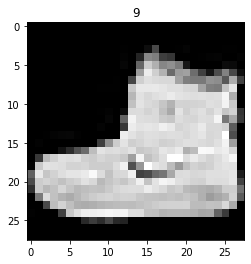

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [4]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

/var/folders/g0/4sztkkz50bl93xkrltlpkfkc0000gn/T/ipykernel_27256/4149896949.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)


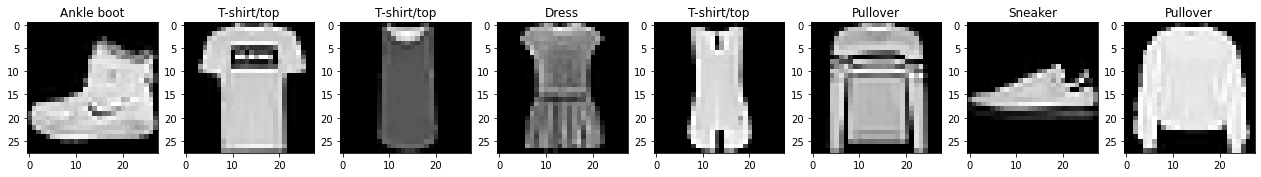

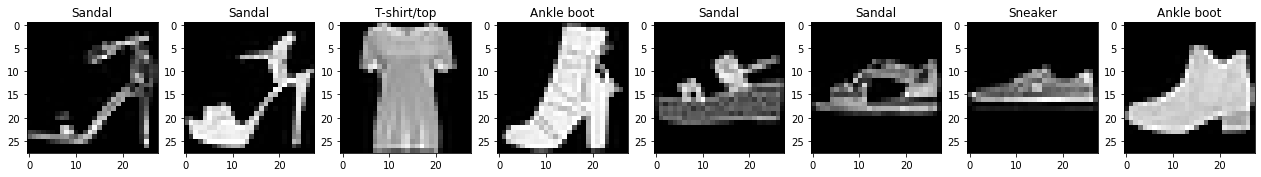

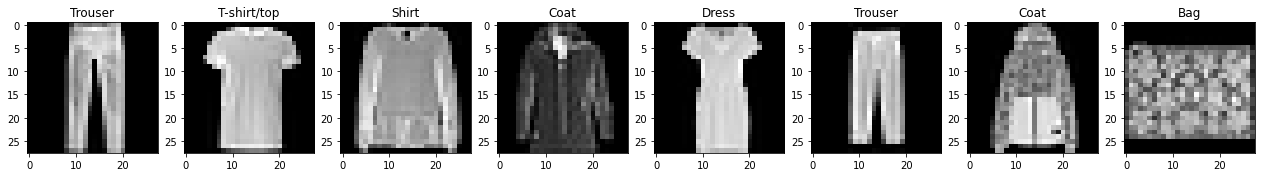

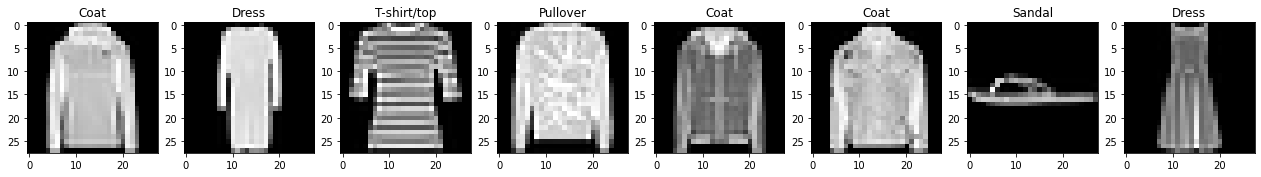

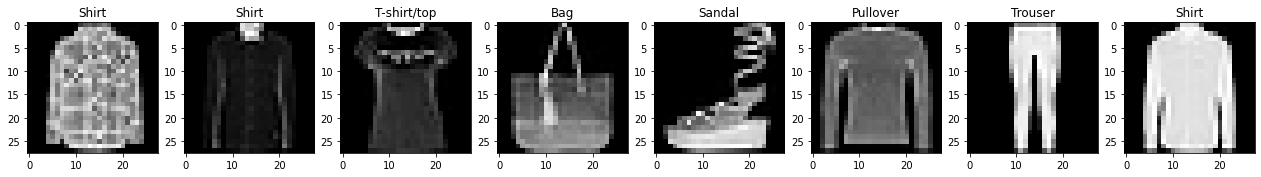

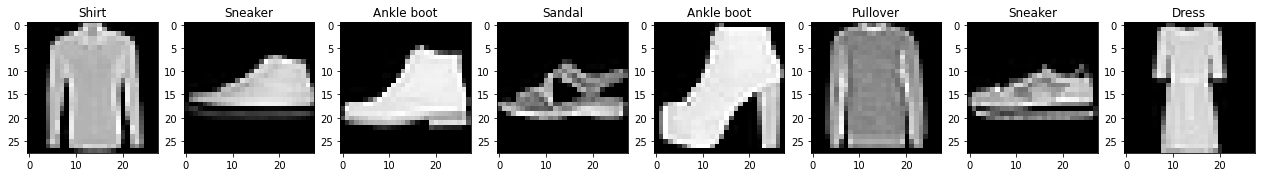

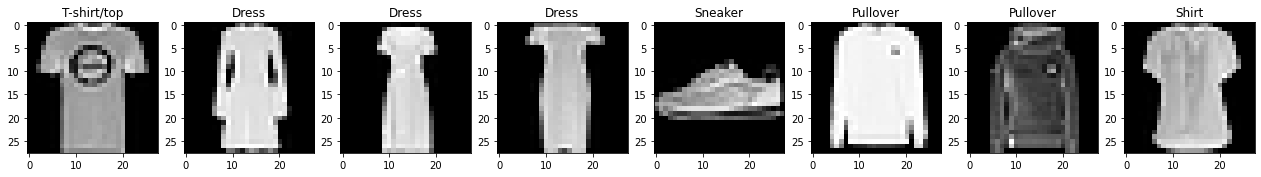

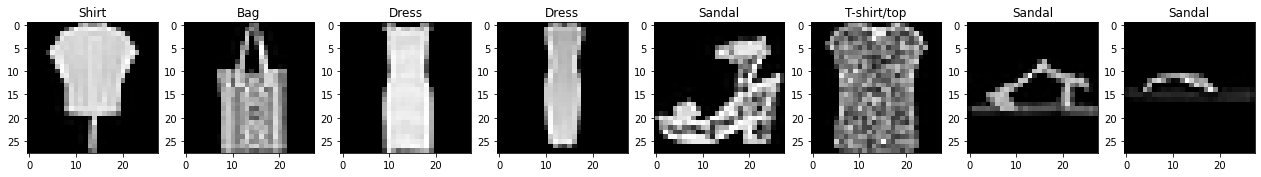

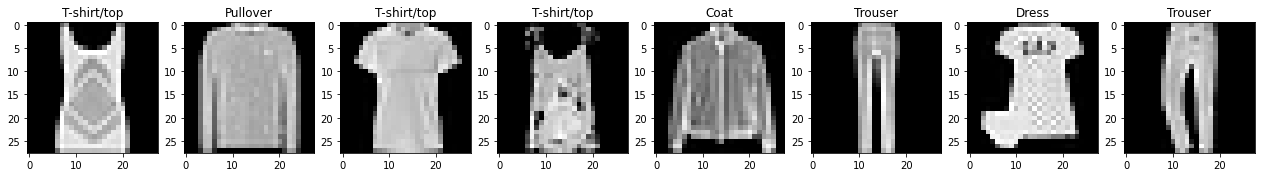

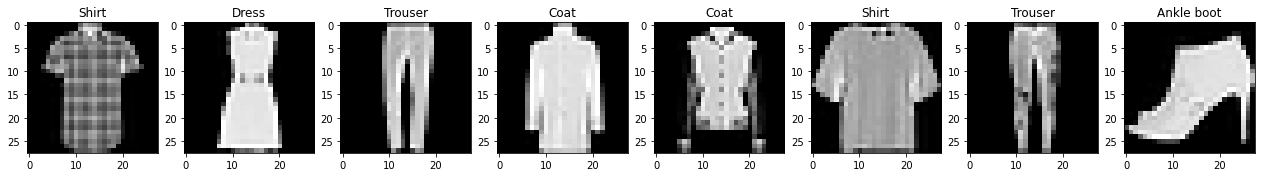

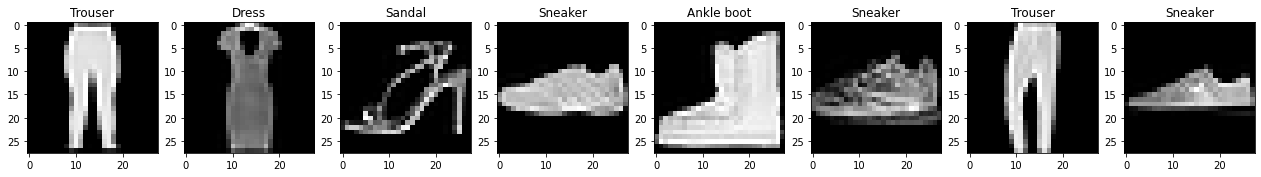

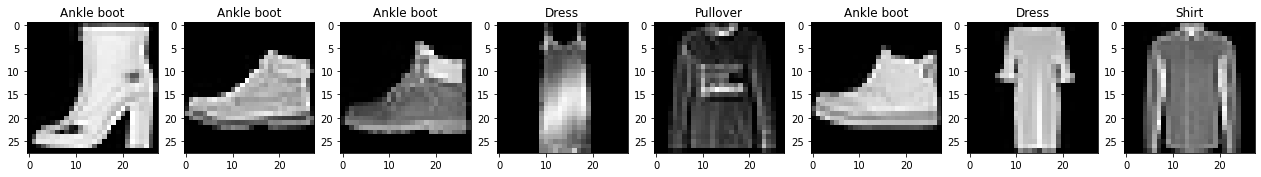

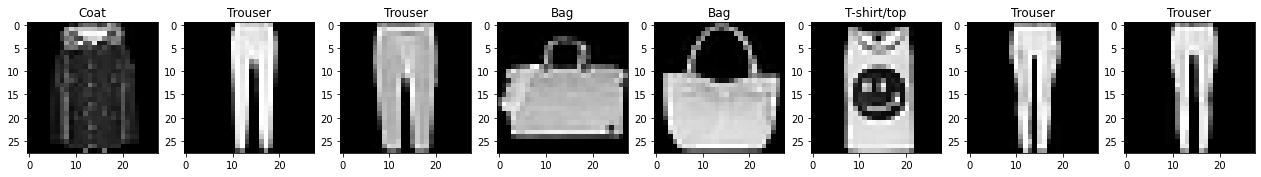

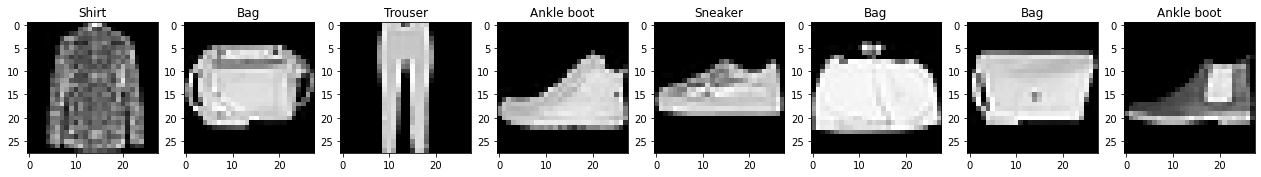

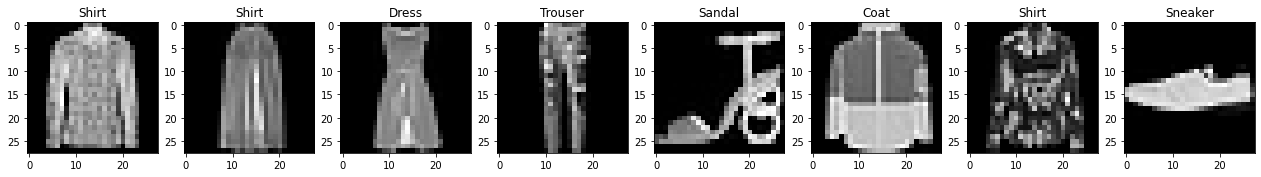

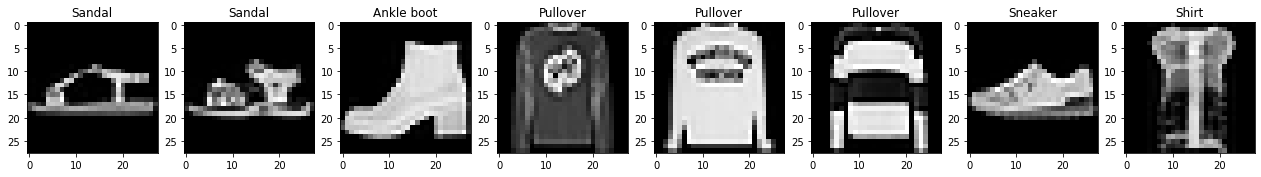

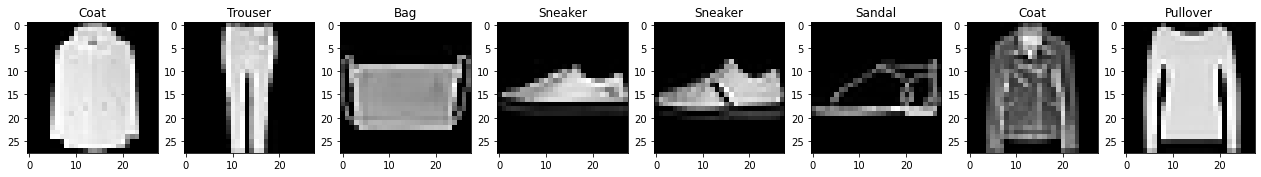

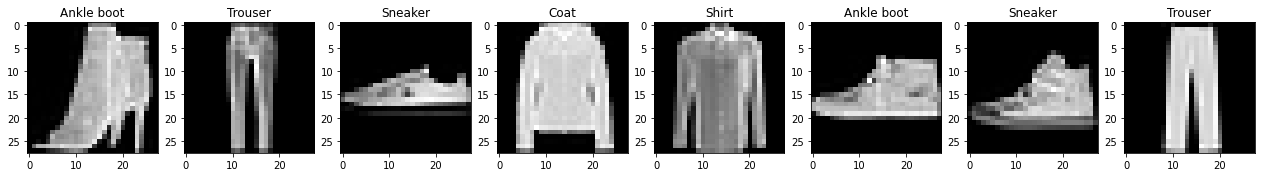

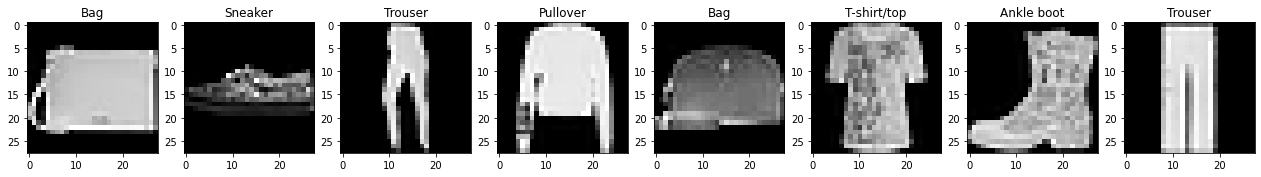

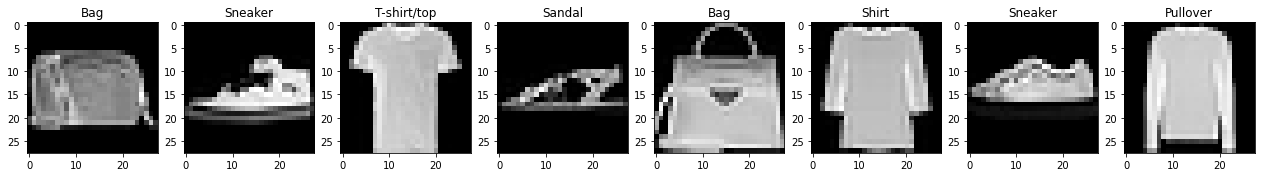

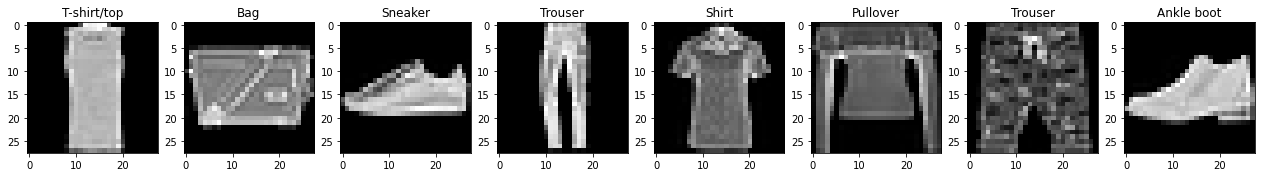

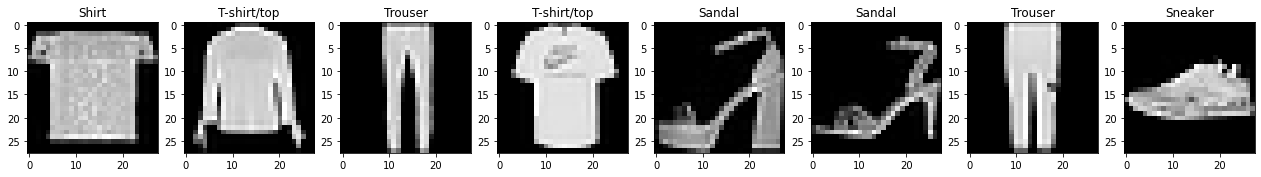

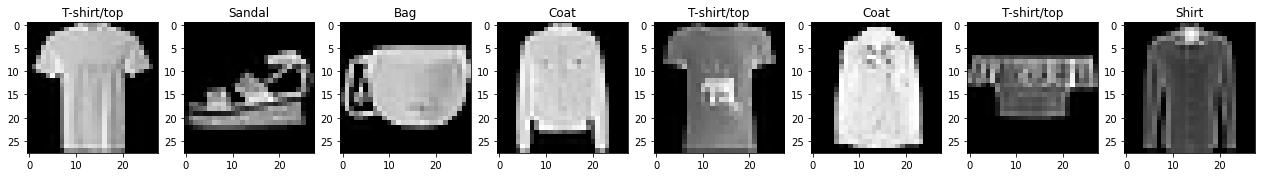

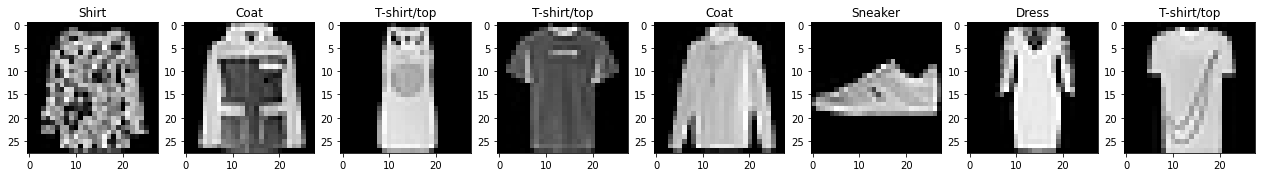

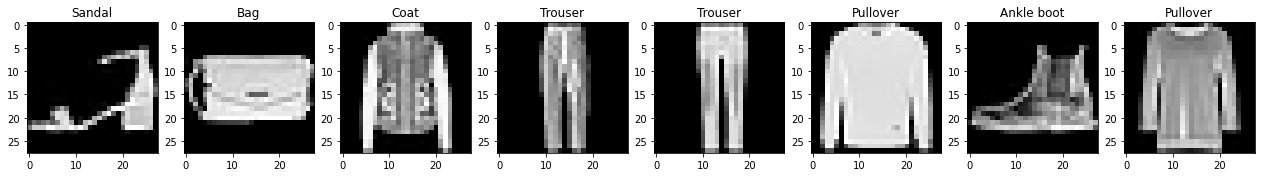

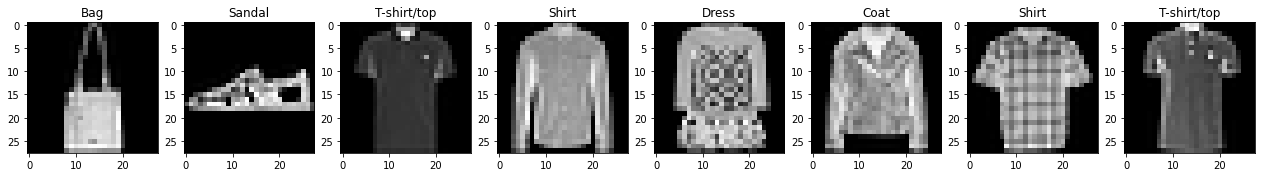

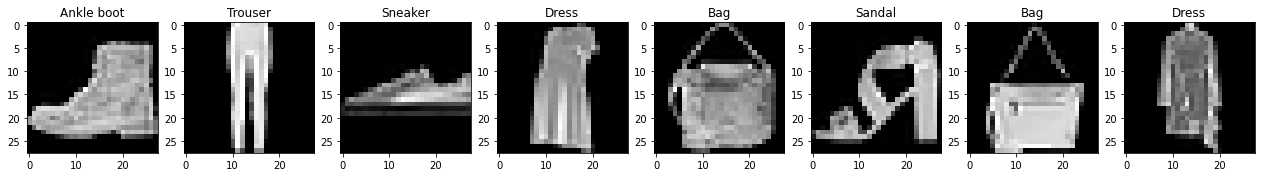

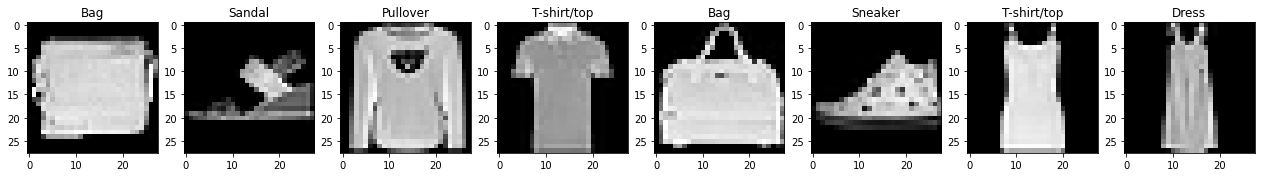

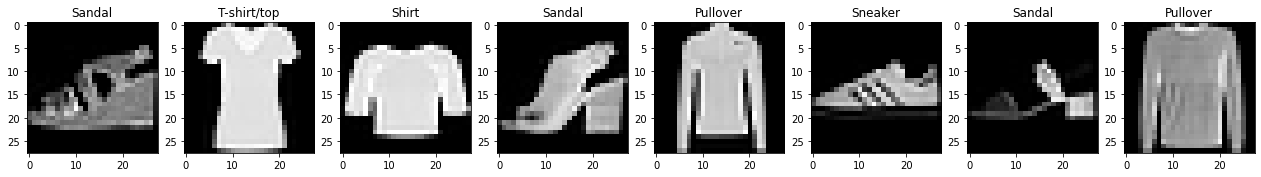

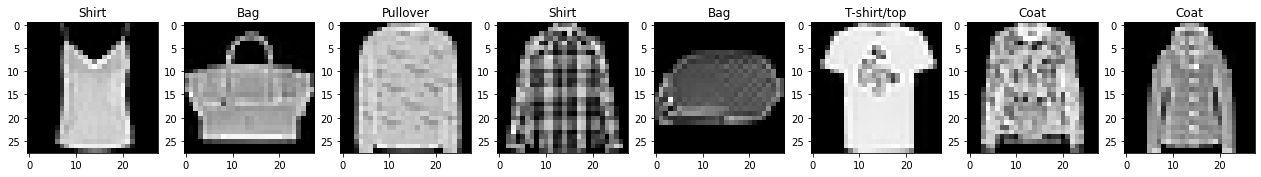

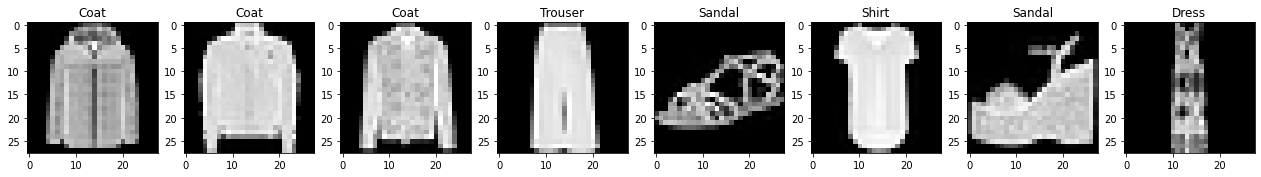

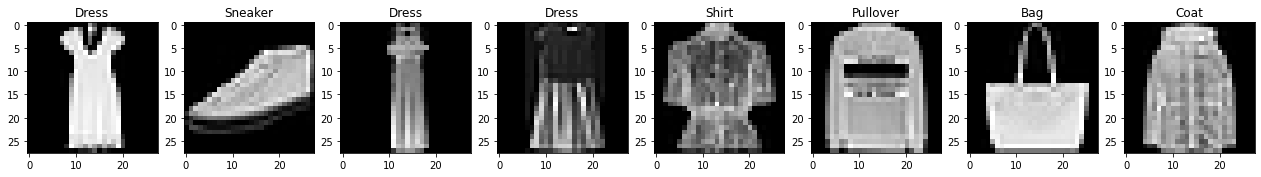

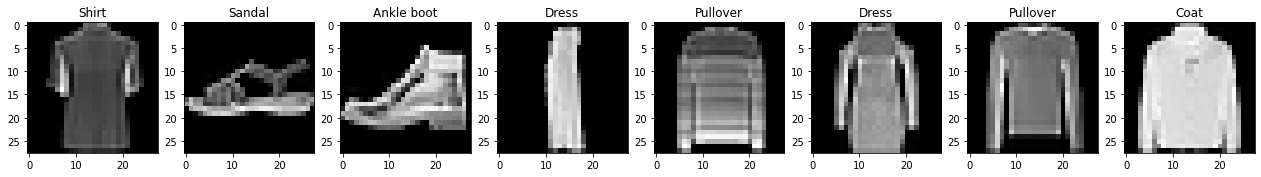

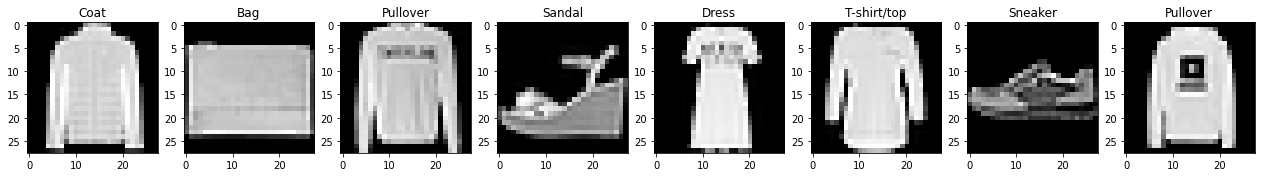

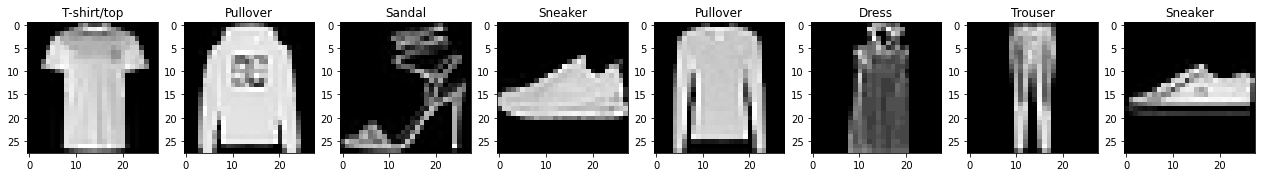

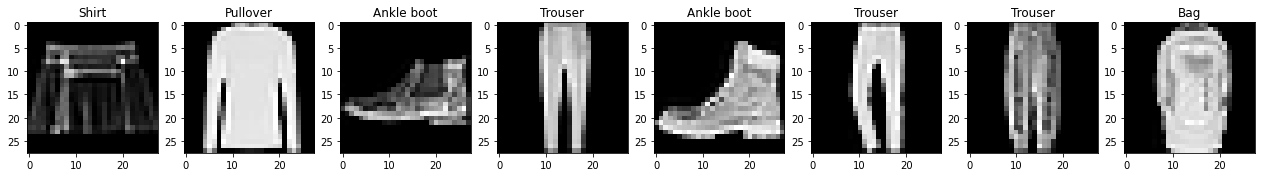

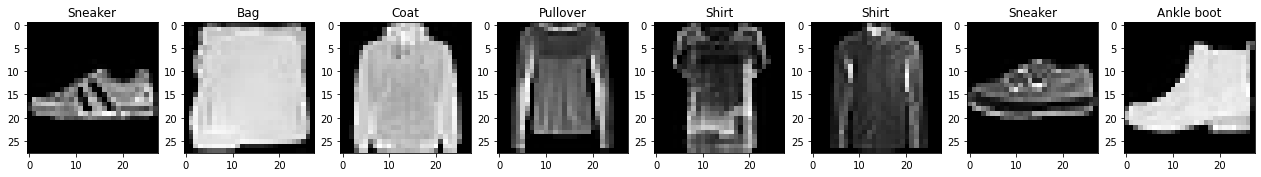

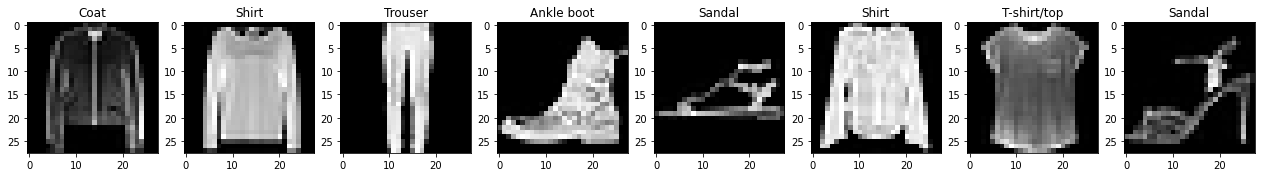

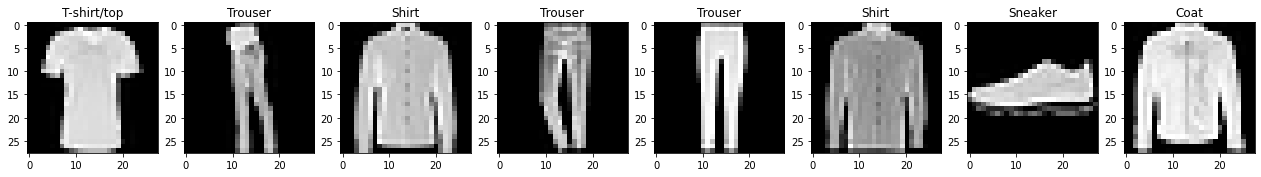

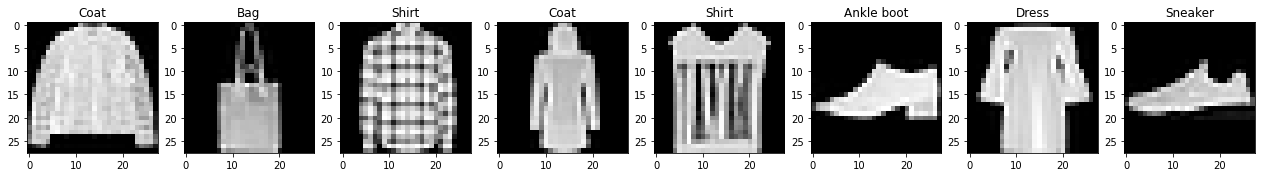

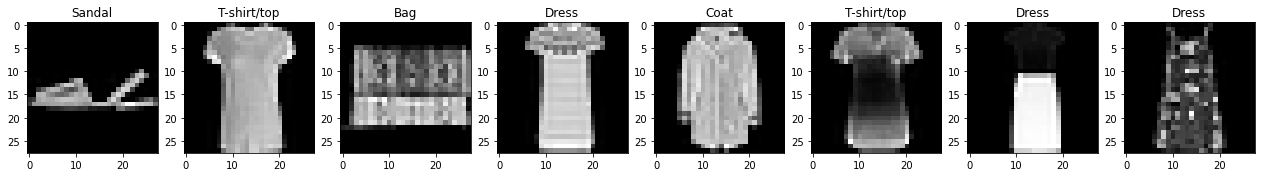

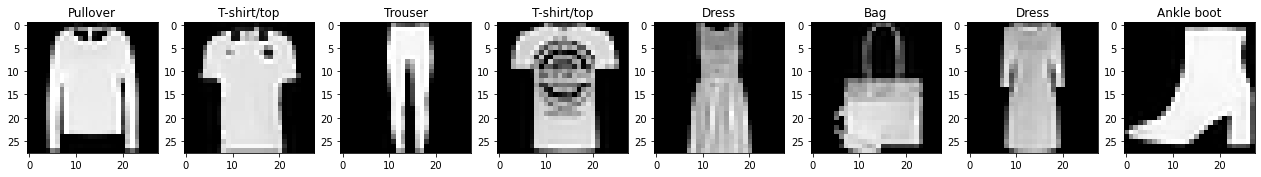

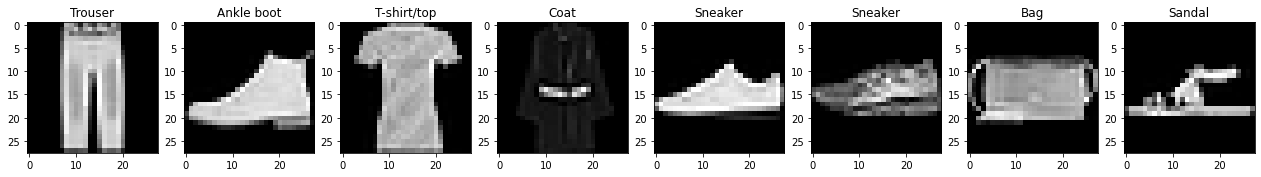

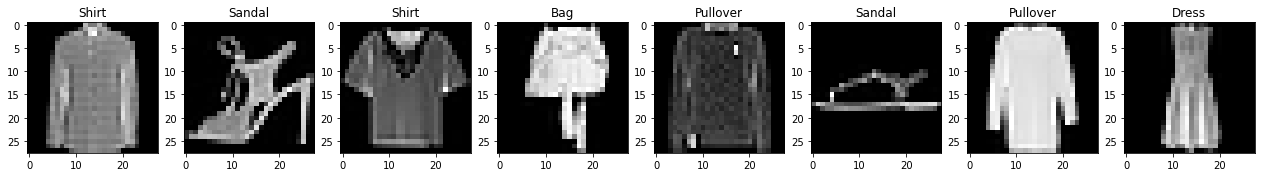

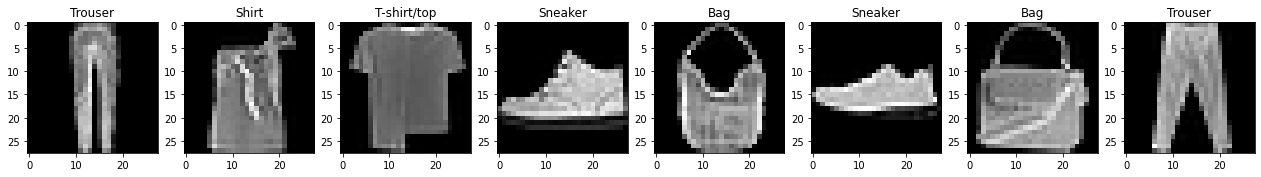

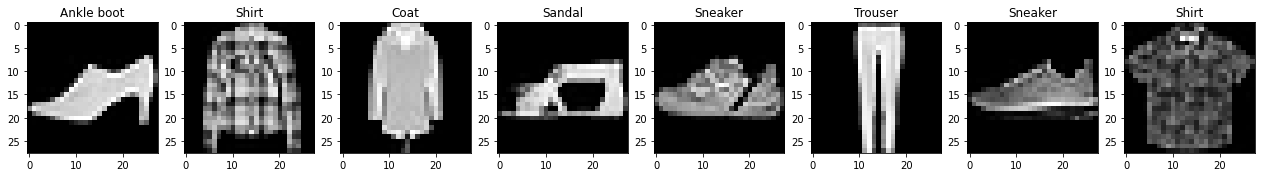

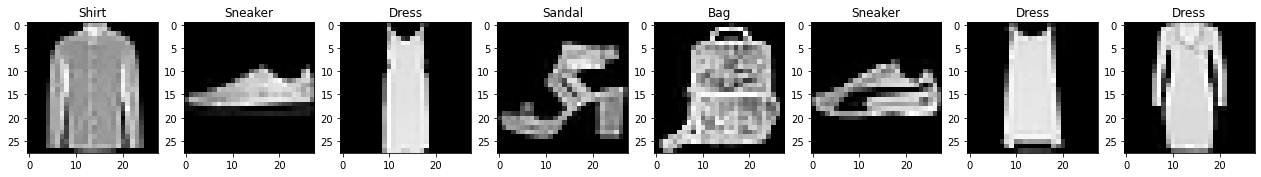

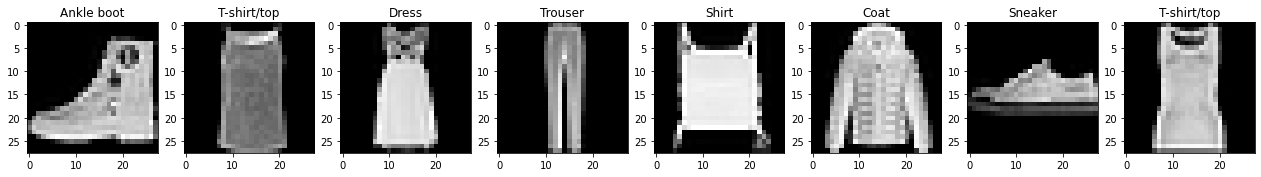

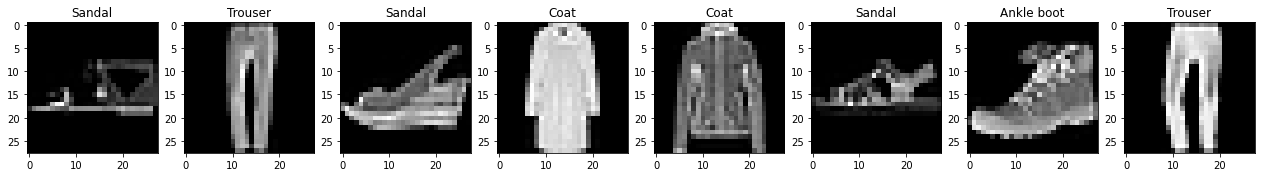

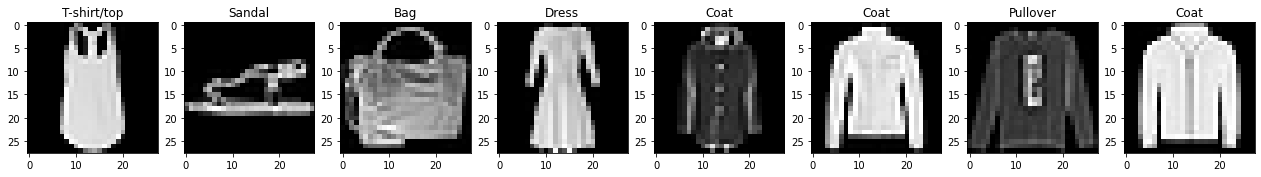

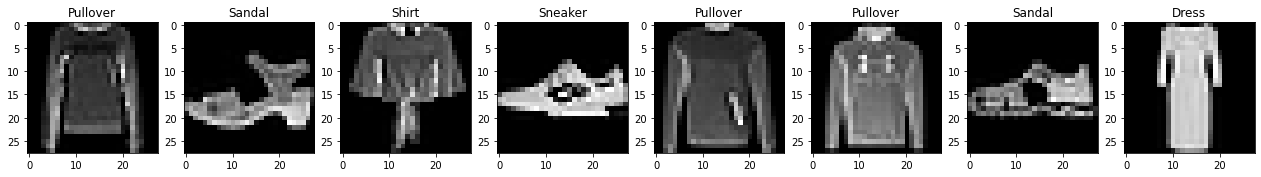

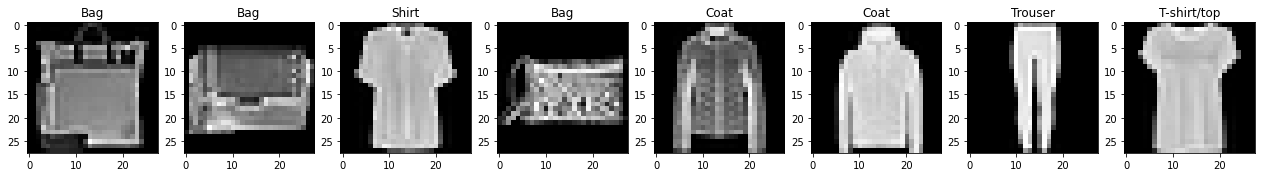

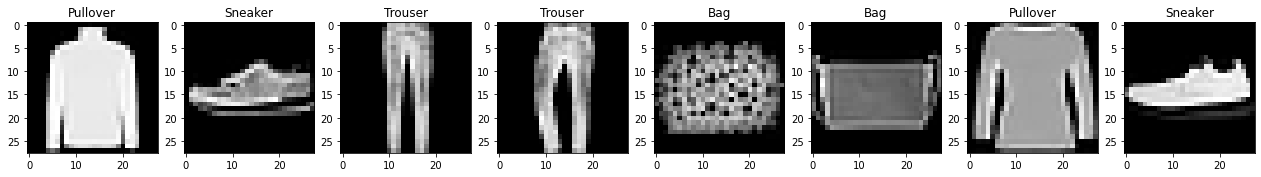

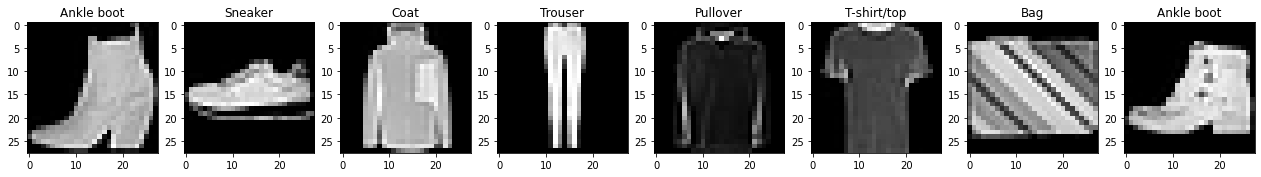

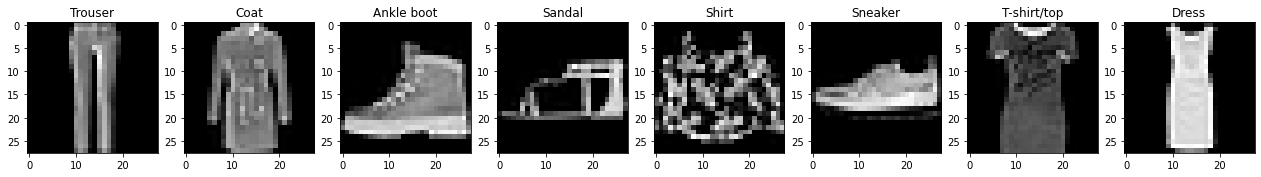

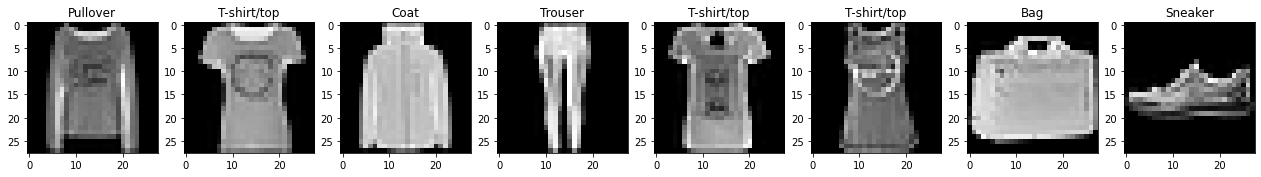

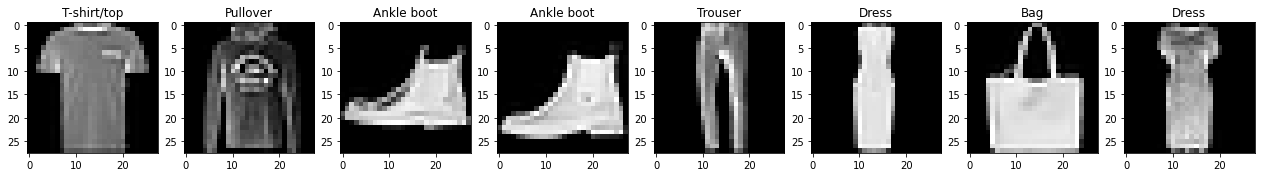

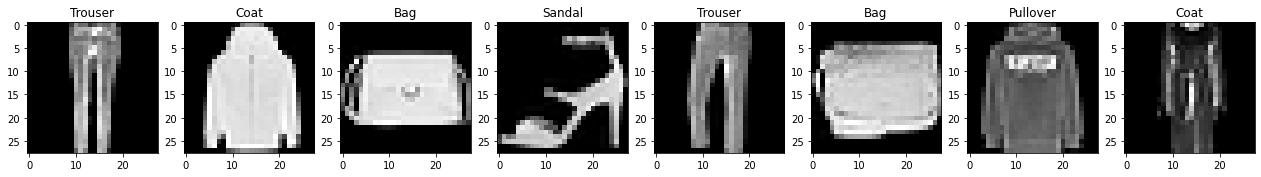

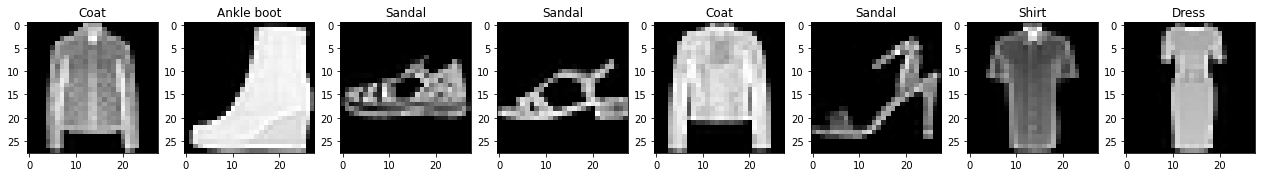

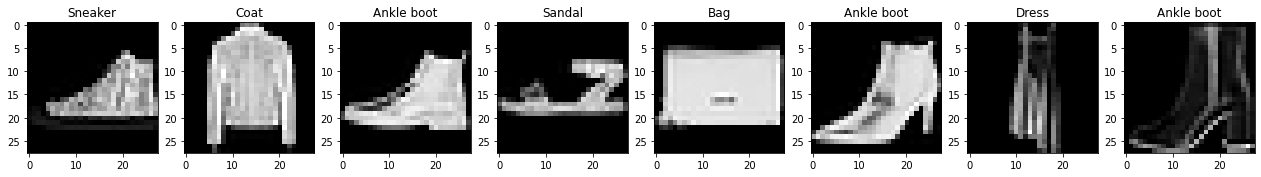

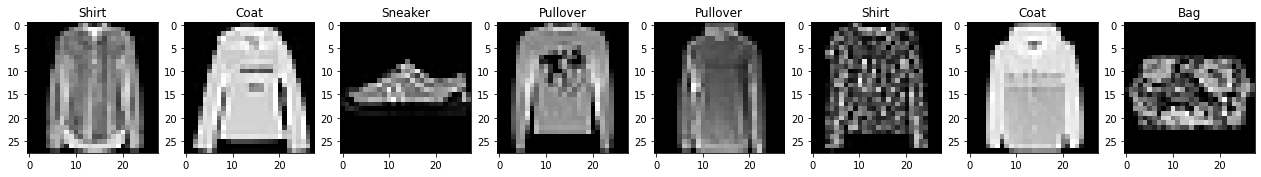

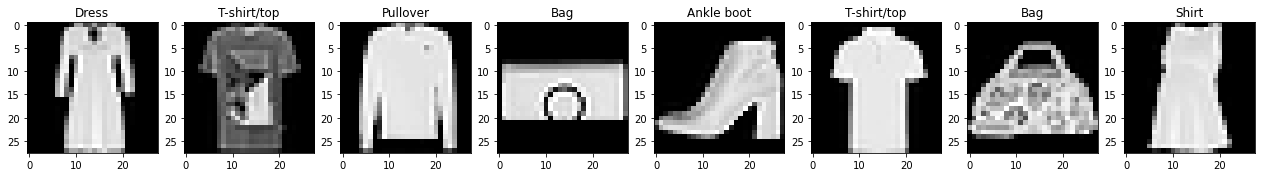

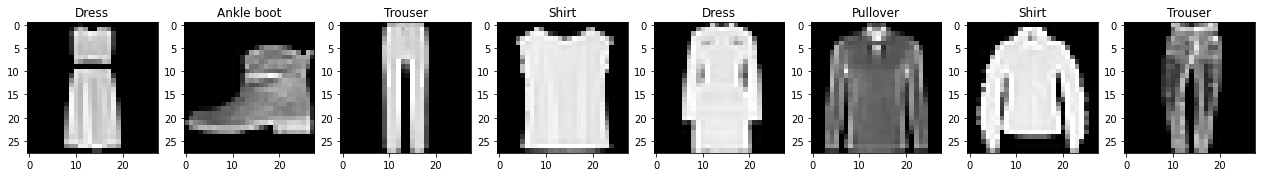

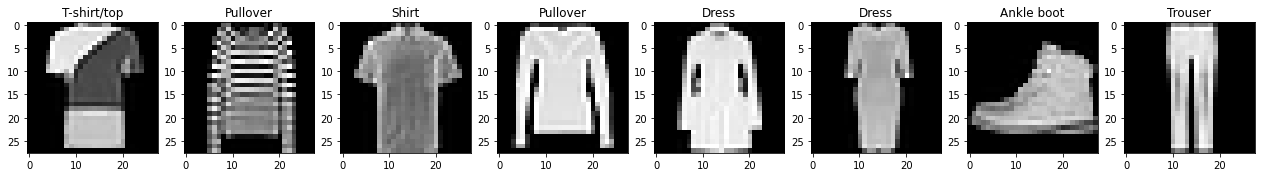

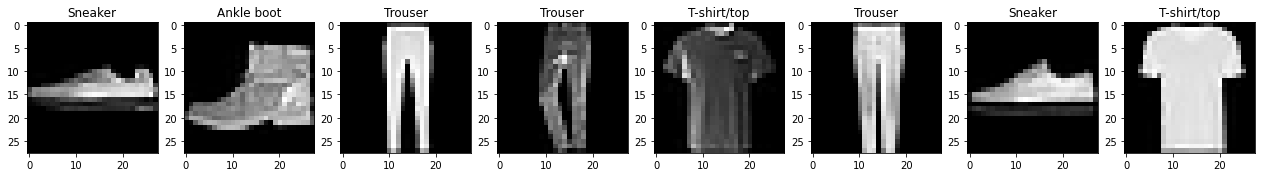

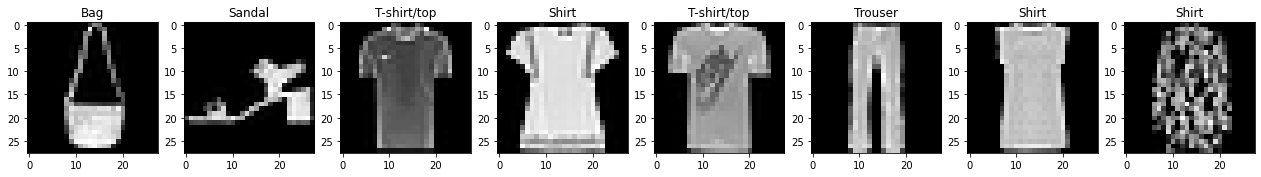

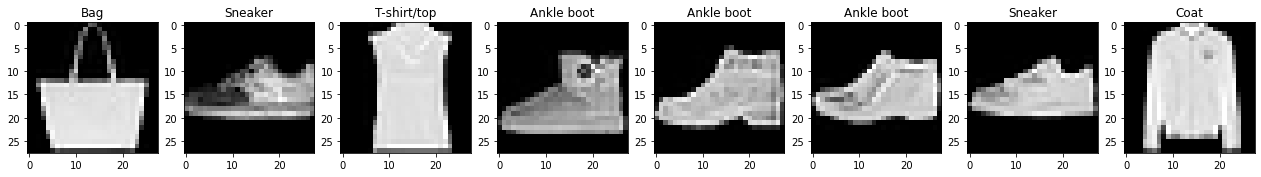

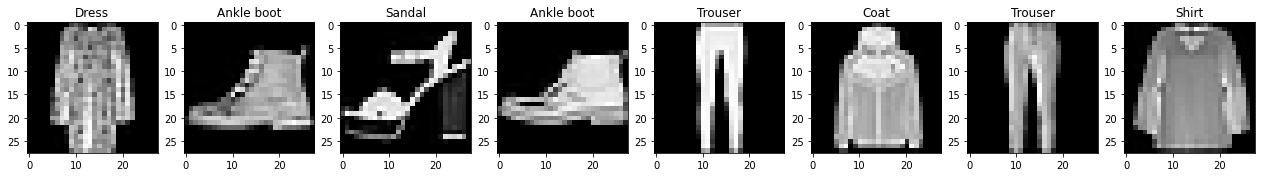

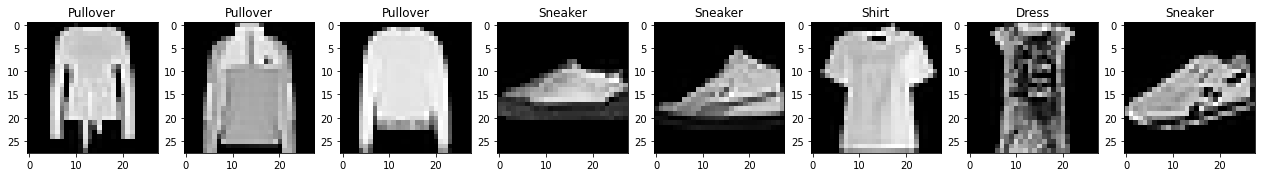

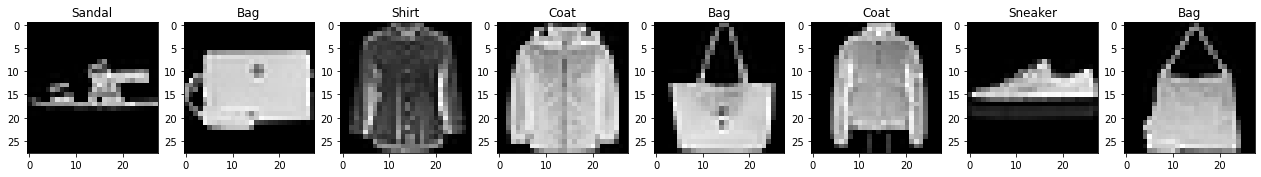

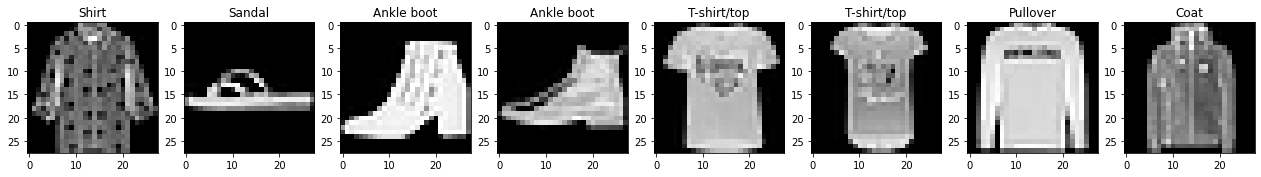

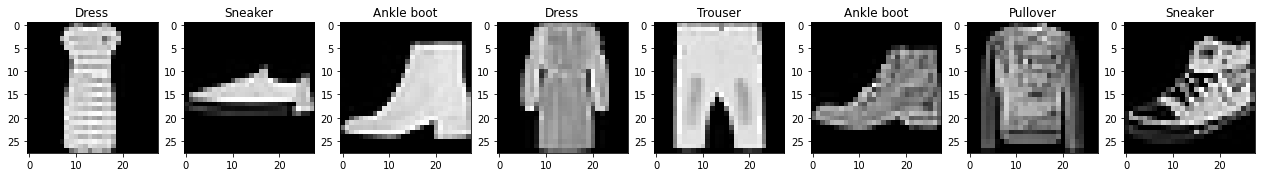

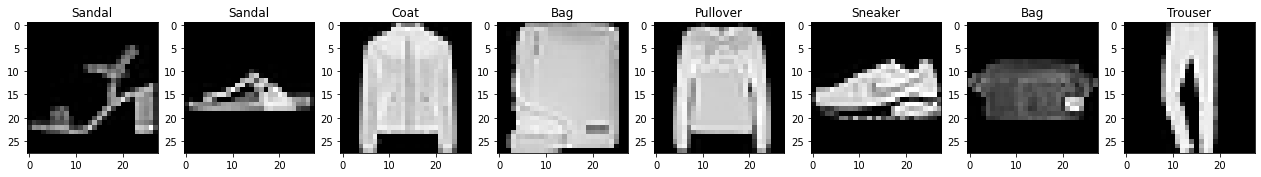

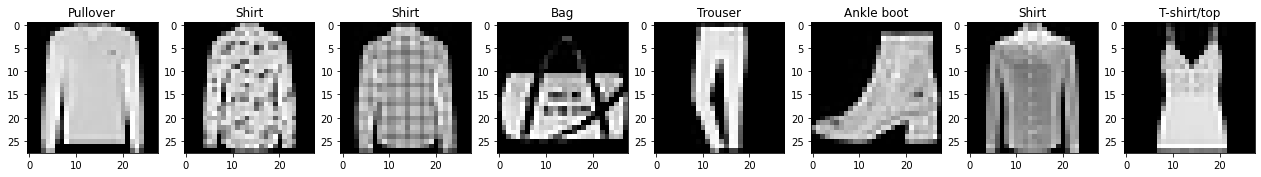

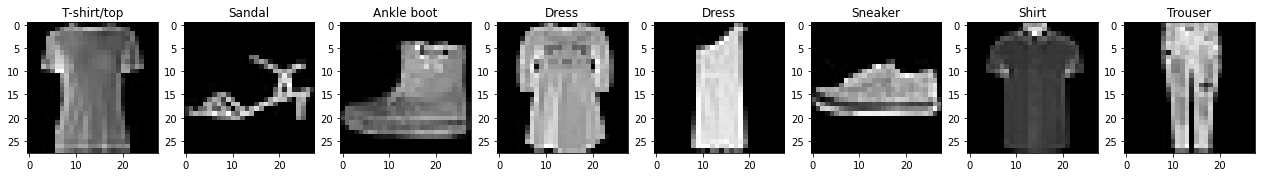

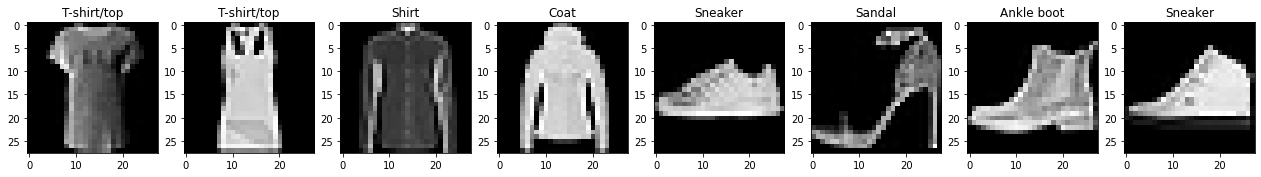

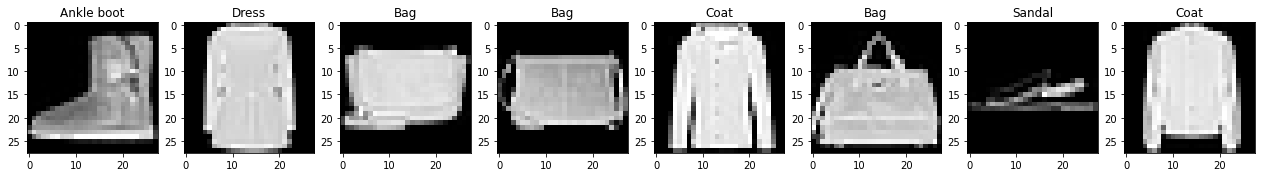

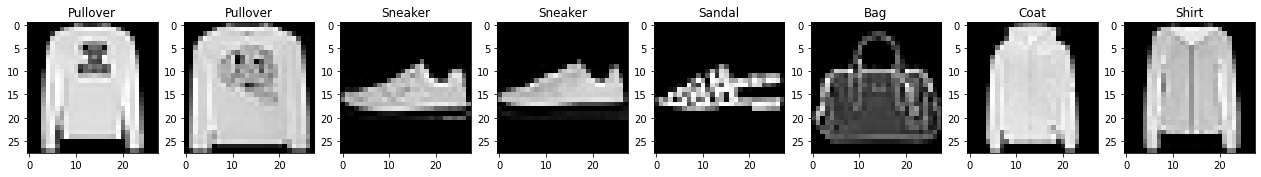

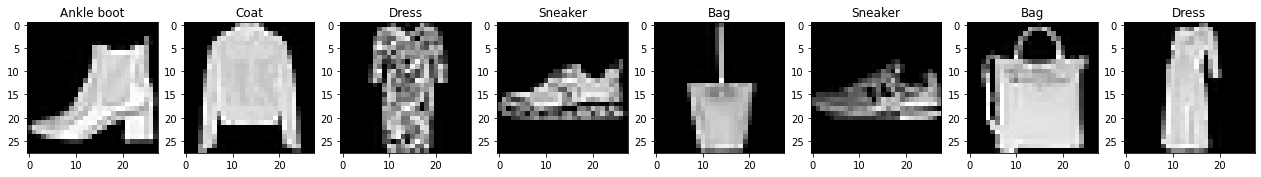

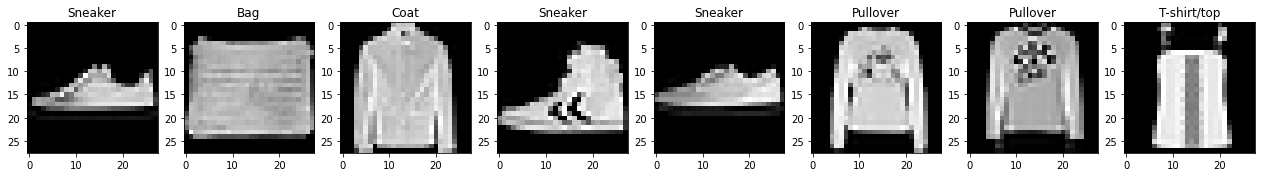

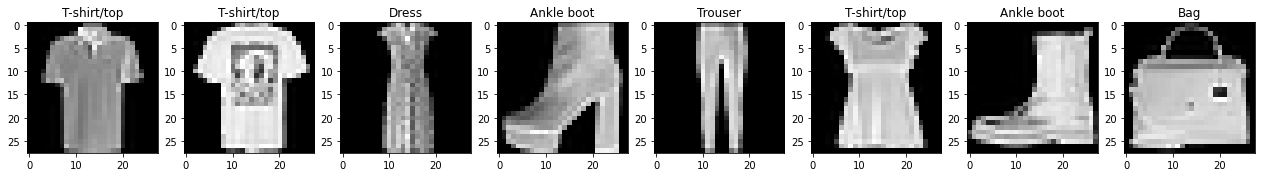

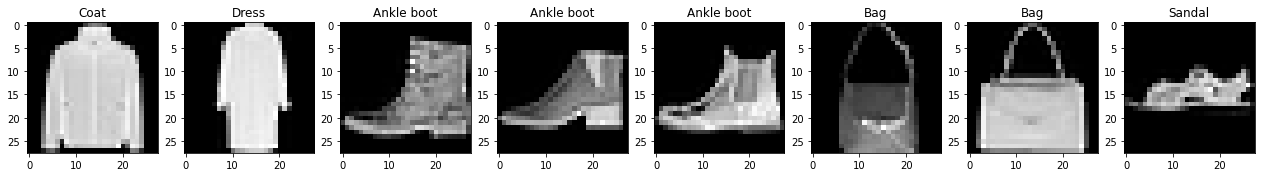

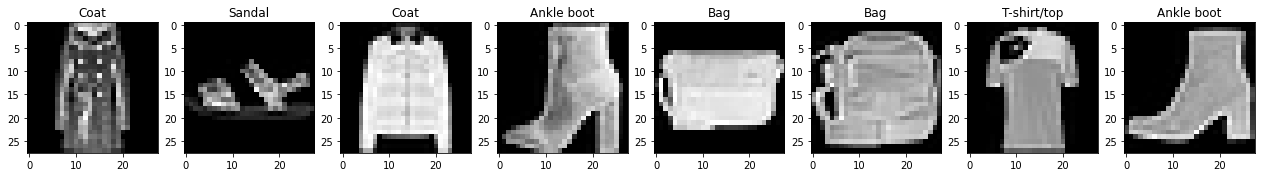

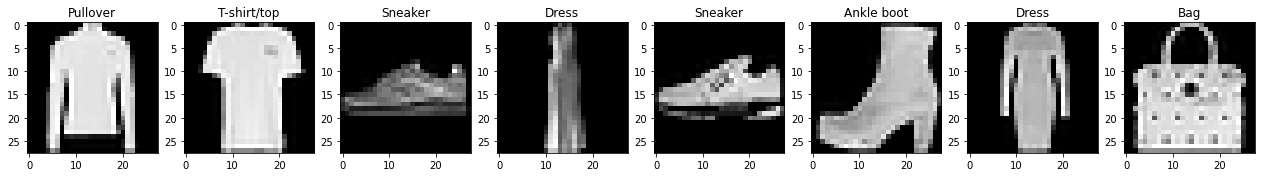

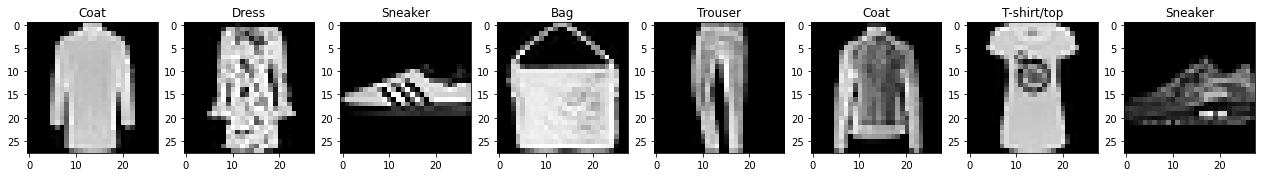

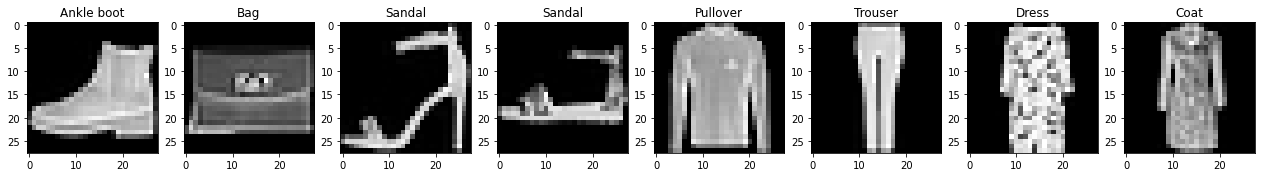

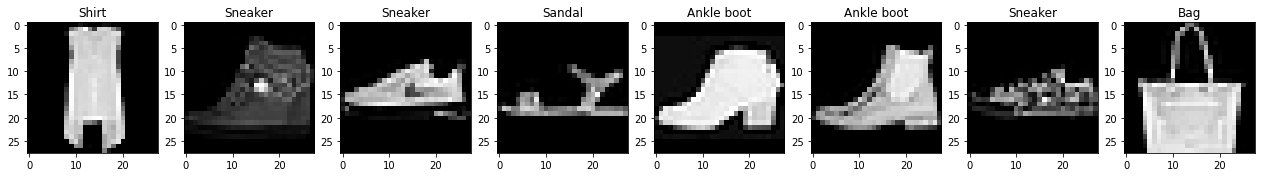

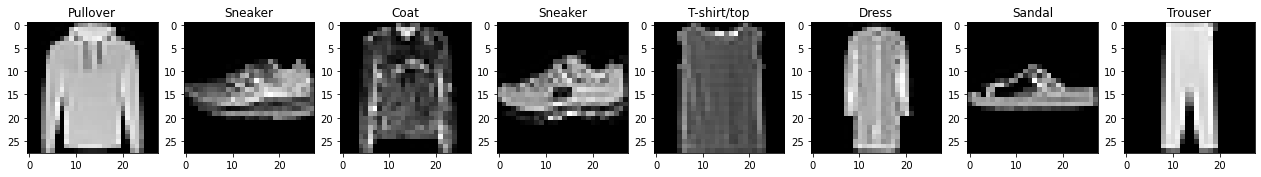

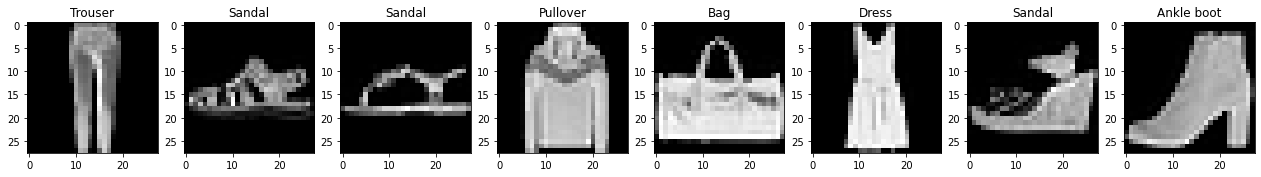

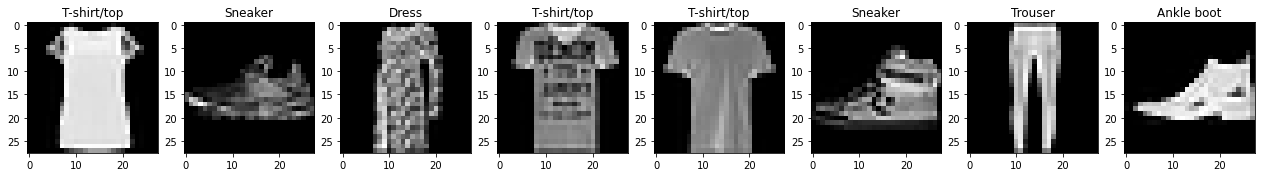

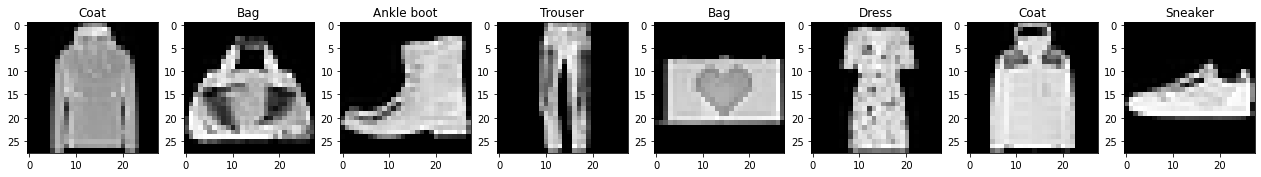

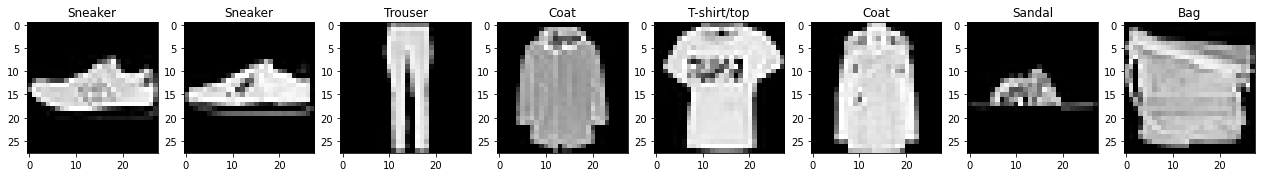

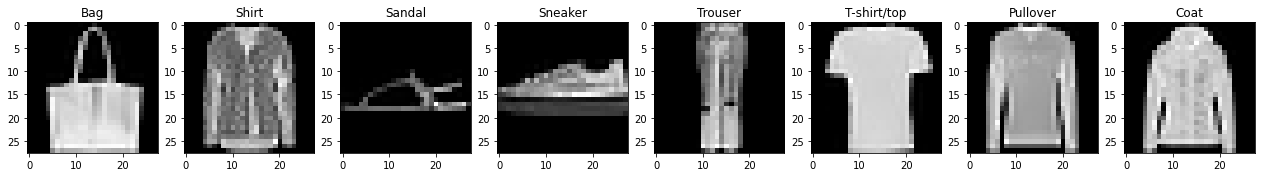

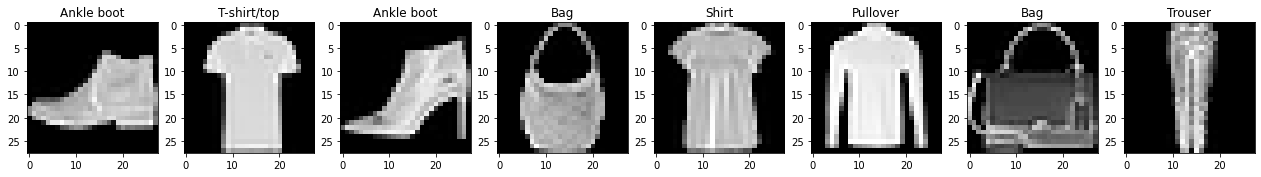

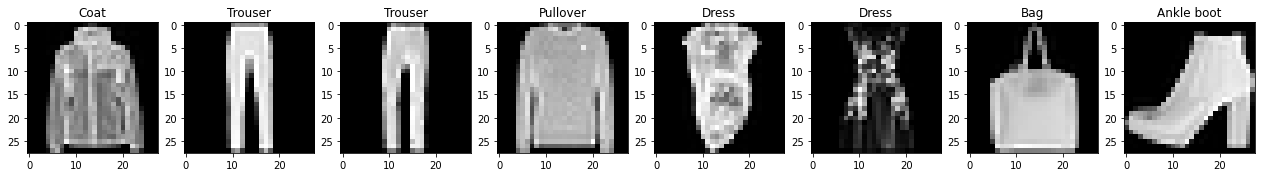

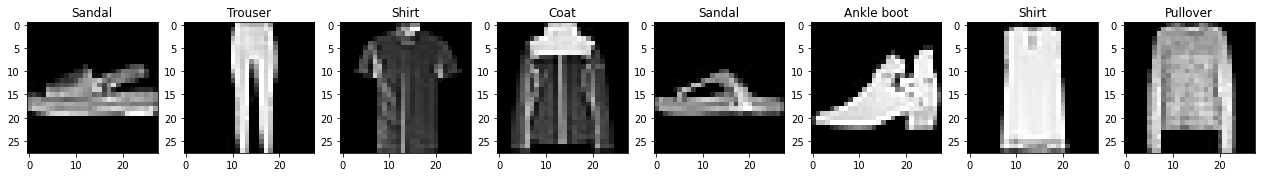

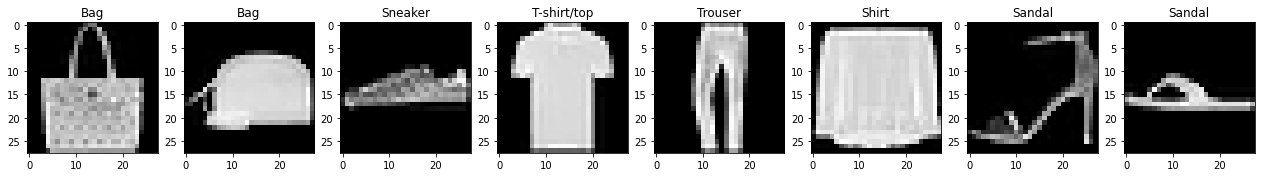

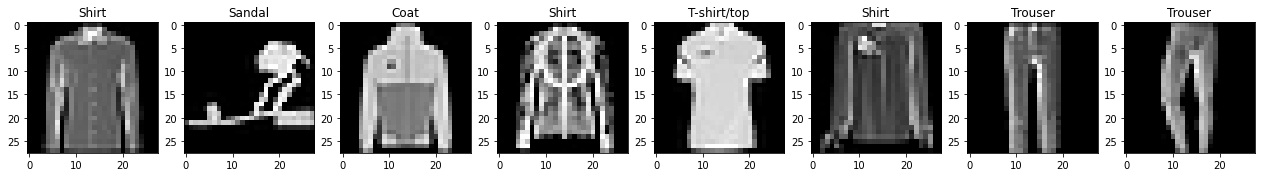

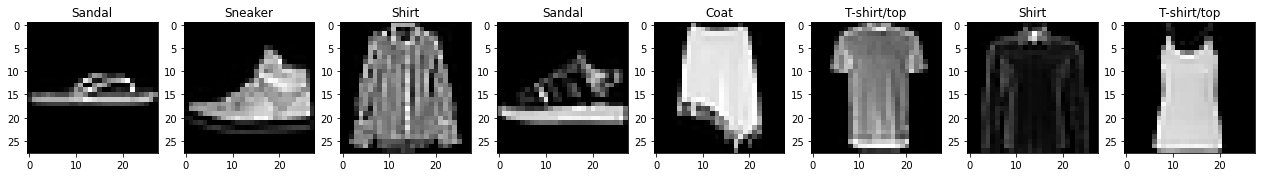

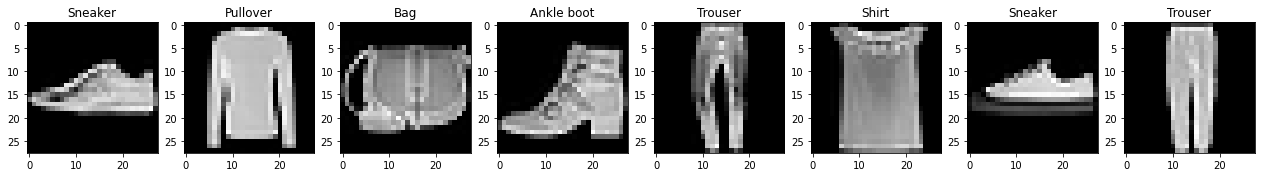

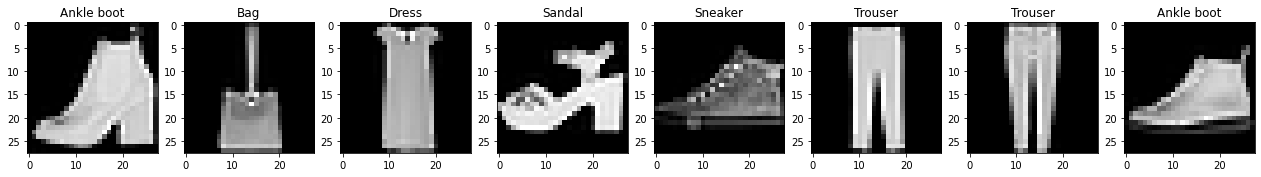

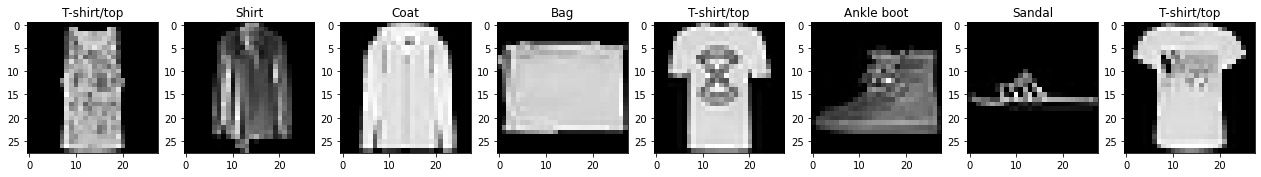

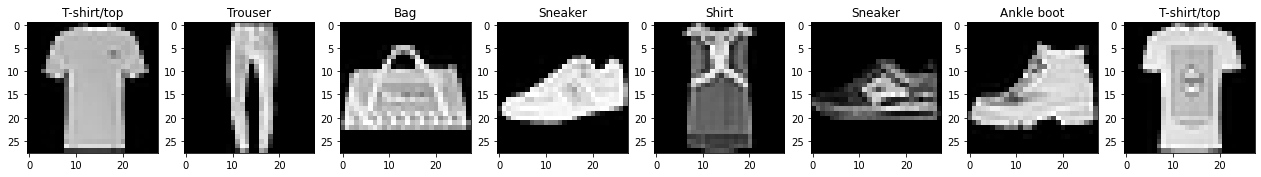

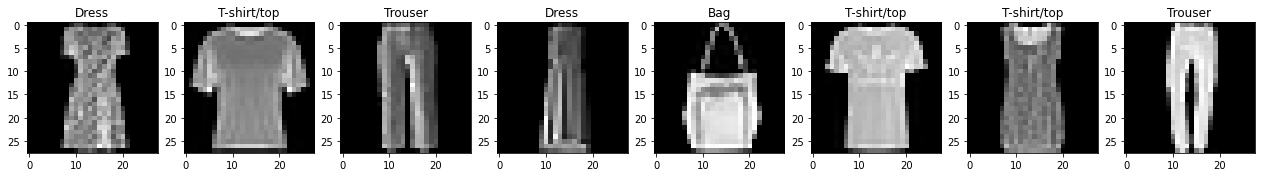

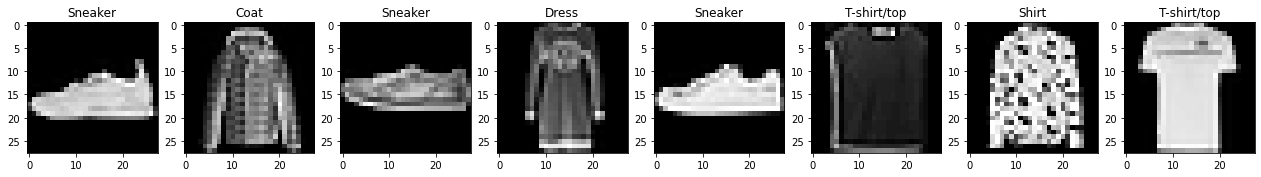

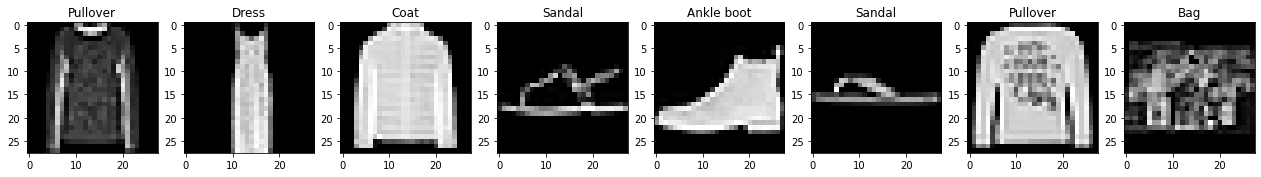

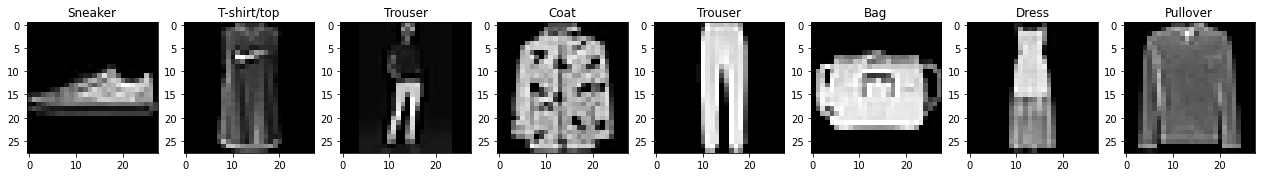

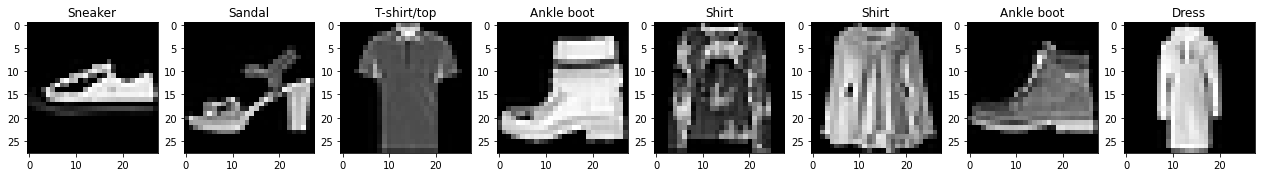

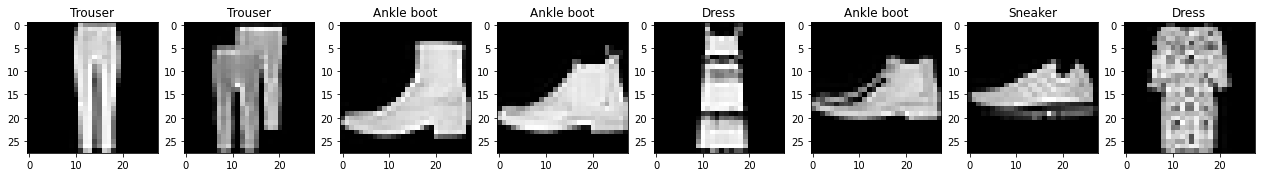

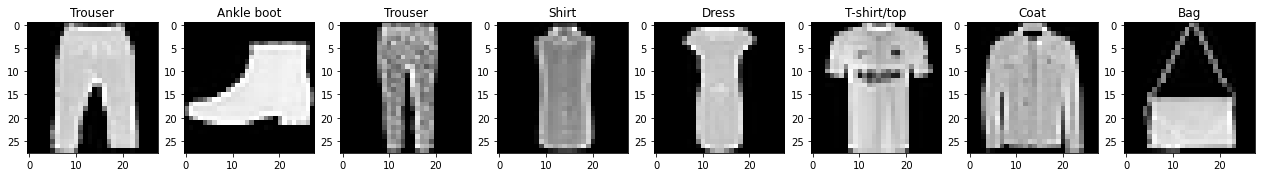

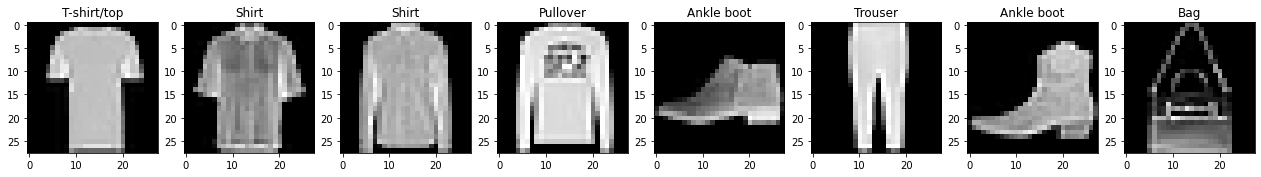

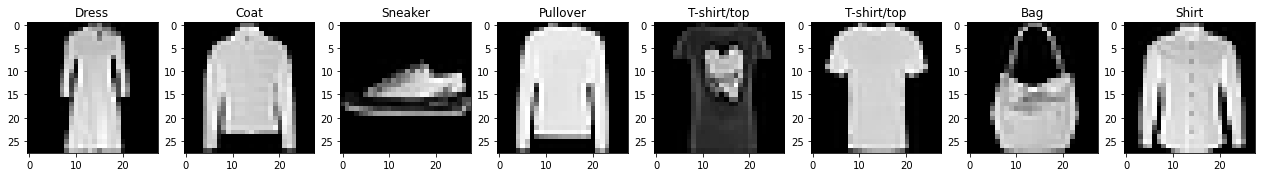

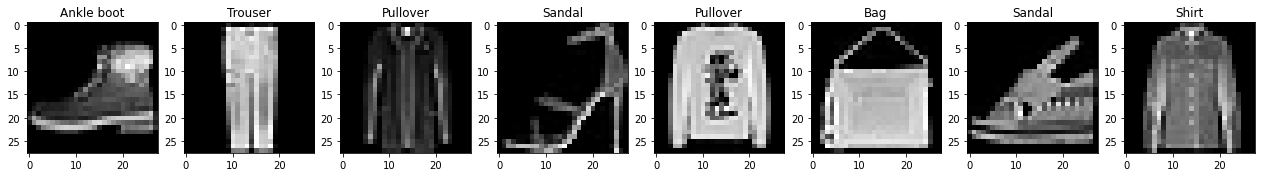

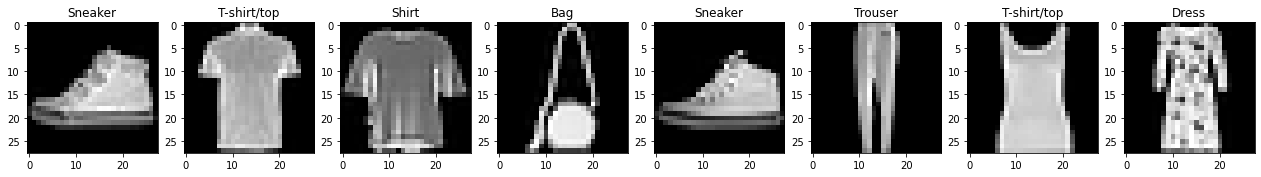

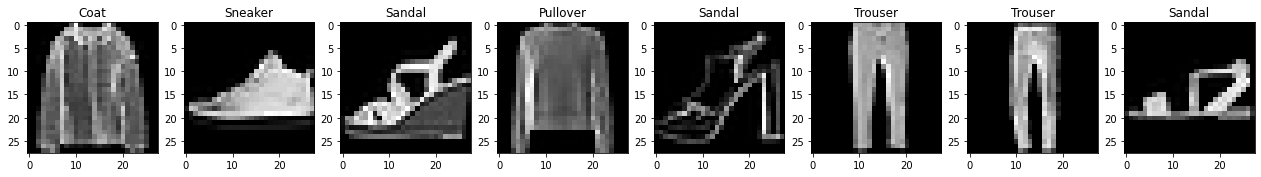

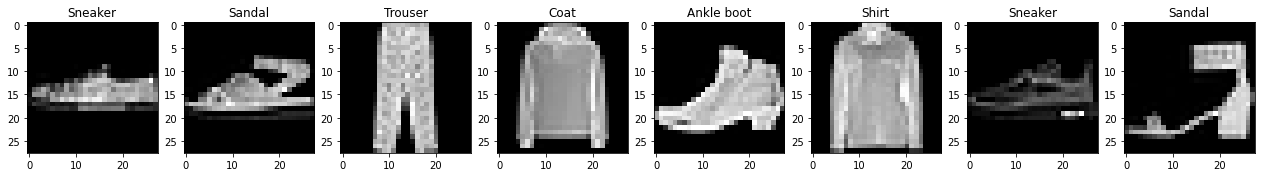

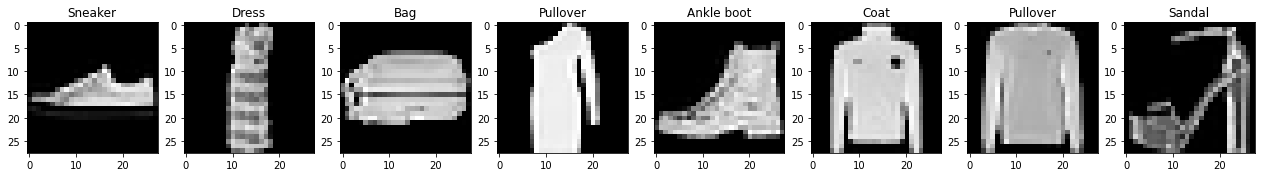

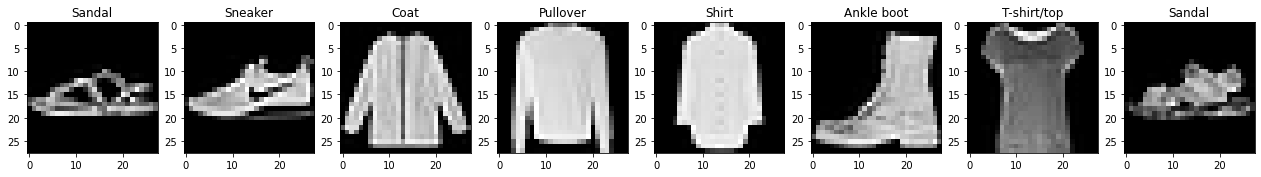

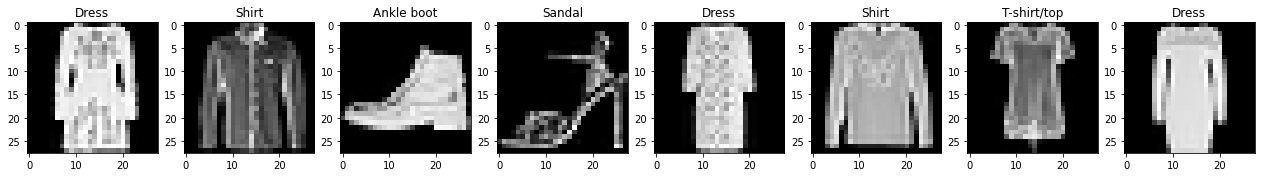

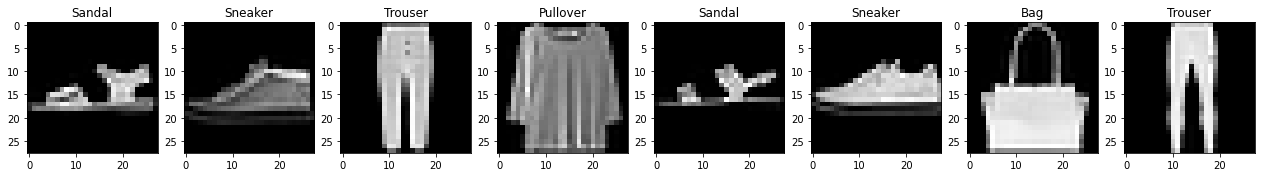

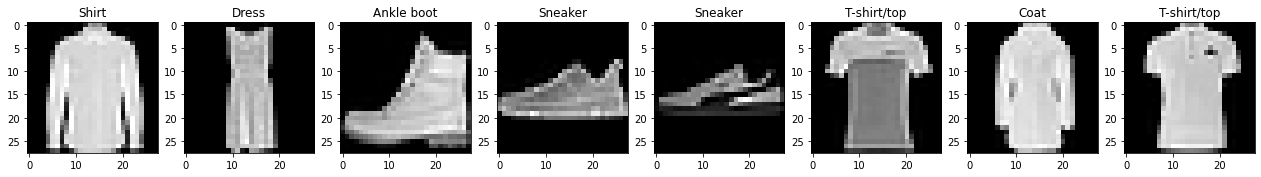

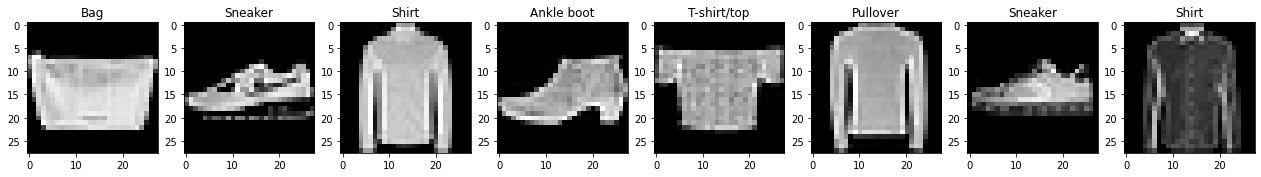

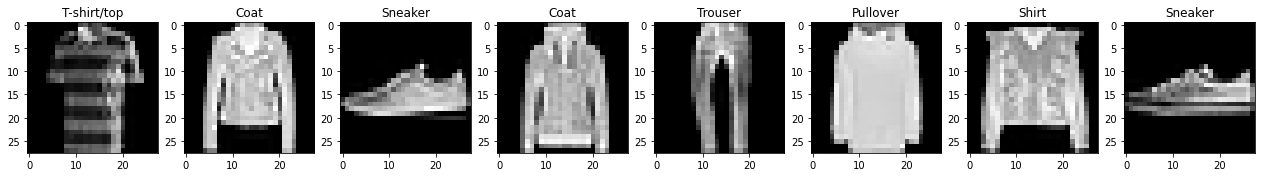

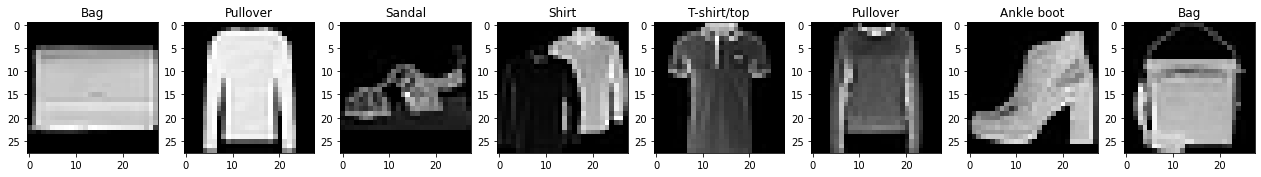

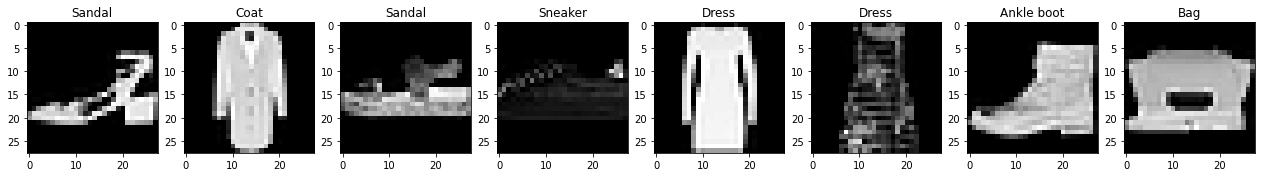

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

# show_images(train_images[:8], train_labels[:8], ncols=8)
# show_images(train_images[8:16], train_labels[8:16], ncols=8)

for i in range(0, 1000, 8):
    show_images(train_images[i:i+8], train_labels[i:i+8], ncols=8)

In [9]:
def get_preprocessed_data(images, labels):
    
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print('train dataset shape: ', train_images.shape, train_labels.shape)
print('test dataset shape: ', test_images.shape, test_labels.shape)

train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


In [10]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
INPUT_SIZE = 28

In [12]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


2021-08-11 10:51:08.761595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-11 10:51:08.762343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [15]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

2021-08-11 10:59:30.291583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-11 10:59:30.295328: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-11 10:59:30.438521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5093 - accuracy: 0.8207
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3781 - accuracy: 0.8640
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3457 - accuracy: 0.8738
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3201 - accuracy: 0.8839
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3024 - accuracy: 0.8893
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2877 - accuracy: 0.8934
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2761 - accuracy: 0.8972
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2667 - accuracy: 0.9004
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2567 - accuracy: 0.9035
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.247

In [16]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5092802047729492, 0.37809377908706665, 0.34570014476776123, 0.32007113099098206, 0.30241116881370544, 0.28766676783561707, 0.2760624885559082, 0.26670515537261963, 0.2567487955093384, 0.24746981263160706, 0.2413172870874405, 0.2324126958847046, 0.22658458352088928, 0.2201017588376999, 0.21286225318908691, 0.2088126391172409, 0.2034589797258377, 0.1963755339384079, 0.19273899495601654, 0.18537113070487976]
[0.8206999897956848, 0.863966703414917, 0.8737500309944153, 0.8838833570480347, 0.8893499970436096, 0.8934000134468079, 0.897183358669281, 0.9003666639328003, 0.9034833312034607, 0.9070500135421753, 0.909766674041748, 0.9129999876022339, 0.9142500162124634, 0.9169000387191772, 0.919533371925354, 0.9217000007629395, 0.9226166605949402, 0.9250333309173584, 0.9277333617210388, 0.9295333623886108]
